# <center> Predicting Bike Rentals </center>
<center>(Goal of this project is to practice using Linear Regression, Decision Trees, and Random Forests using the SKLearn machine learning library)</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv('hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


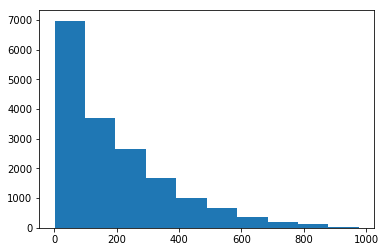

In [5]:
plt.hist(bike_rentals['cnt'])
plt.show()

In [6]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [7]:
def assign_label(hour):
    if 0 <= hour < 6:
        return 4
    elif 6 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    elif 18 <= hour <= 24:
        return 3
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [8]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')

In [9]:
fields_to_drop = ['cnt', 'casual', 'registered', 'dteday']
bike_rentals.drop(fields_to_drop, axis=1)
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [10]:
X = bike_rentals[['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']]

y = bike_rentals['cnt']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,time_label
11229,11230,2,1,4,2,0,3,1,2,0.50,0.4848,0.42,0.1940,4
6334,6335,4,0,9,12,0,1,1,2,0.68,0.6364,0.79,0.1642,2
11060,11061,2,1,4,0,0,3,1,1,0.34,0.3030,0.36,0.4179,4
12346,12347,2,1,6,15,0,0,0,1,0.70,0.6364,0.34,0.0000,2
15437,15438,4,1,10,10,0,3,1,1,0.56,0.5303,0.52,0.2985,1


In [13]:
y_train.head()

11229      9
6334     209
11060     30
12346    644
15437    217
Name: cnt, dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lr.intercept_

111.8840908268773

In [18]:
lr.coef_

array([ -5.33497331e-03,   2.18151416e+01,   1.31368739e+02,
         3.36998615e+00,   6.49949674e+00,  -2.39530990e+01,
         1.75467335e+00,   3.75427892e+00,  -1.08403666e+01,
         9.33187098e+01,   1.96244121e+02,  -1.66003024e+02,
         1.01564001e+01,  -4.87577605e+01])

In [19]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
instant,-0.005335
season,21.815142
yr,131.368739
mnth,3.369986
hr,6.499497
holiday,-23.953099
weekday,1.754673
workingday,3.754279
weathersit,-10.840367
temp,93.318710


In [20]:
predictions = lr.predict(X_test)

In [21]:
predictions

array([ 405.95660355,  173.97579219,   -2.69356669, ...,  388.94264725,
        294.37957959,  114.87640089])

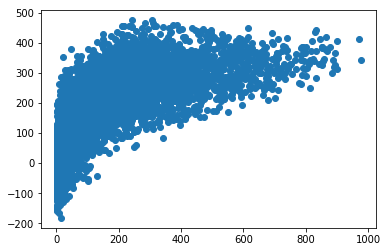

In [22]:
plt.scatter(y_test, predictions)

In [23]:
from sklearn import metrics

In [24]:
metrics.mean_absolute_error(y_test, predictions)

98.894023901606076

In [25]:
metrics.mean_squared_error(y_test, predictions)

17064.782769750826

In [26]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

130.63224245855548